In [ ]:
# v1.01

In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import easyocr
import re

# Early testing environment with hard-coded file import

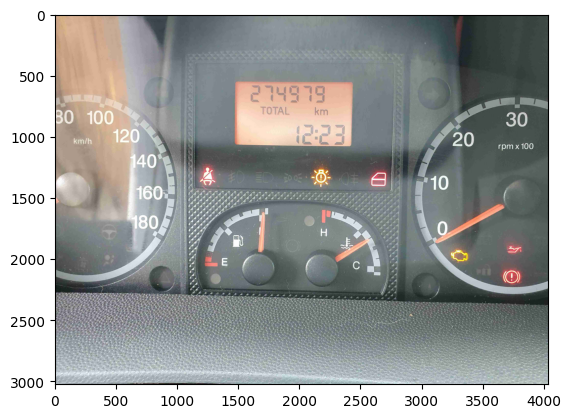

In [5]:
# Read hard-coded image
file="20210911_122338.jpg"
img_path = f"../data/main-dataset/{file}"
img = cv2.imread(img_path)

# Display image
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

Resize image defining the longest side

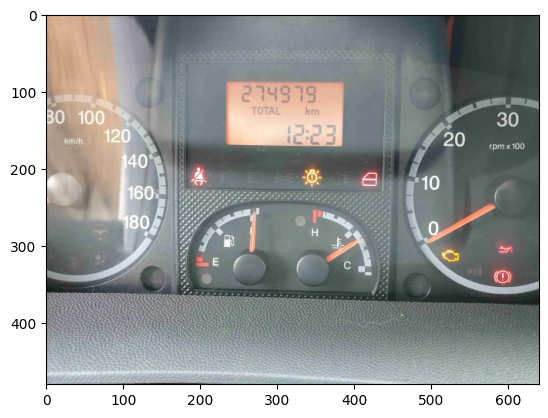

In [5]:
# Dimensions of the original image
original_height, original_width = img.shape[:2]

# Define the longest side
max_size = 640  # or new_height, depending on which side you want to define

# Calculate the image proportions
ratio = max_size / max(original_height, original_width)

# Calculate new image dimensions
new_dimensions = (int(original_width * ratio), int(original_height * ratio))

# Change the resolution
resized_img = cv2.resize(img_rgb, new_dimensions, interpolation=cv2.INTER_AREA)

# Display the image
plt.imshow(resized_img)

Convert the image to grayscale

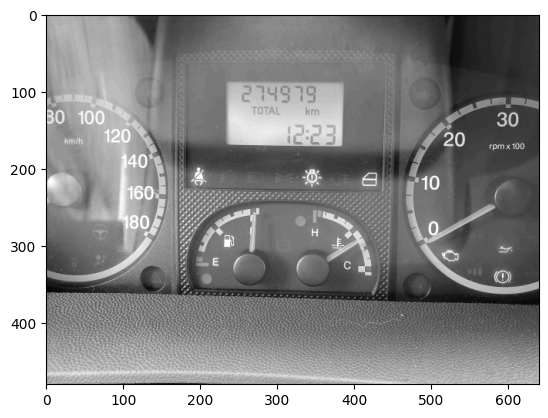

In [6]:
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_RGB2GRAY)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.show()

Binarize the image to improve contrast

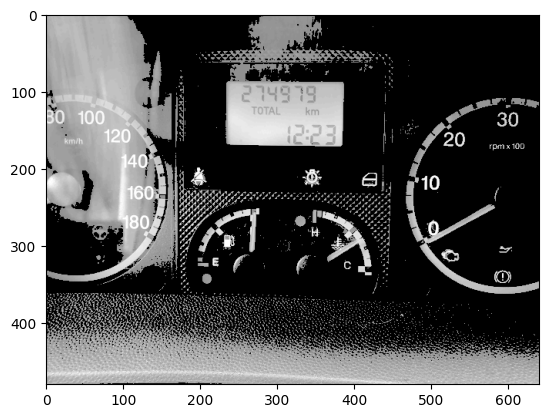

In [15]:
_, binary_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_TOZERO | cv2.THRESH_OTSU)

plt.imshow(binary_img, cmap='gray')

Denoise the image

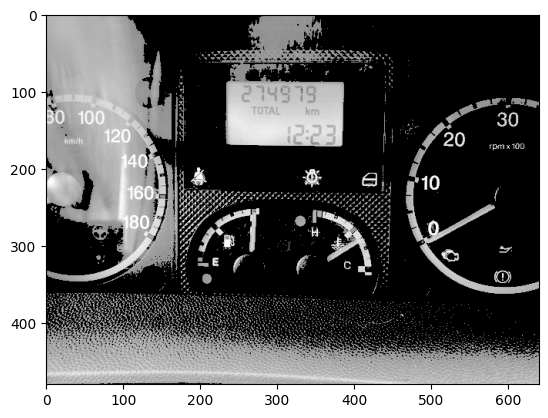

In [19]:
denoised_img = cv2.fastNlMeansDenoising(binary_img, None, h=7, templateWindowSize=87, searchWindowSize=21)
plt.imshow(denoised_img, cmap='gray')

Testing every step with OCR - currently selected denoised image

In [21]:
# Build an OCR reader
reader = easyocr.Reader(['en'])

# Attempt to read the text from the image

# result = reader.readtext(img) # no preprocessing
# result = reader.readtext(resized_img) # resized image
# result = reader.readtext(gray_img) # grayscale image
# result = reader.readtext(binary_img) # binary image
result = reader.readtext(denoised_img) # denoised image
print(result)

[([[250, 88], [356, 88], [356, 120], [250, 120]], "2743'9", 0.5346928837620589), ([[0, 114], [30, 114], [30, 148], [0, 148]], '80', 0.7814573189028913), ([[38, 122], [80, 122], [80, 146], [38, 146]], '100:', 0.3569413125514984), ([[265, 119], [307, 119], [307, 133], [265, 133]], 'TOTAL', 0.9816837294197219), ([[335, 121], [357, 121], [357, 135], [335, 135]], 'Km', 0.5607240809637853), ([[582, 124], [618, 124], [618, 152], [582, 152]], '30', 0.9999932565108979), ([[72, 146], [114, 146], [114, 170], [72, 170]], '4120', 0.41242738277001156), ([[316, 140], [376, 140], [376, 168], [316, 168]], '2,23', 0.44056305289268494), ([[512, 148], [550, 148], [550, 178], [512, 178]], '20', 0.9999994099441718), ([[573, 165], [623, 165], [623, 177], [573, 177]], 'rpm * 100', 0.28105740062168794), ([[94, 178], [136, 178], [136, 204], [94, 204]], '740', 0.3587560482653753), ([[484, 204], [516, 204], [516, 234], [484, 234]], '10', 0.9999932565108979), ([[102, 218], [144, 218], [144, 246], [102, 246]], '160

OCR filtering - regex for 6-digit numbers to filter out noise

In [11]:
# Find all 6 digit numbers
six_digit_numbers = re.findall(r'\b\d{6}\b', str(result))

# If no 6-digit number found, return "unreadable"
unreadable_files = []
if not six_digit_numbers:
    print("unreadable")

print (six_digit_numbers)

['274979']


### Testing import file from windows pop-up - opens in a background, press alt+tab to display

In [4]:
import tkinter as tk
from tkinter import filedialog

def browse_files():
    root = tk.Tk()
    root.withdraw()  # Ukryj okno główne tkinter

    # Wyświetl okno dialogowe wyboru plików i zwróć wybraną ścieżkę
    file_path = filedialog.askopenfilename()
    return file_path

file_path = browse_files()
print(file_path)

C:/Users/Dragon/Documents/GitHub/RentML/dataset/ML_test/20210910_103618.jpg
